# Deep Learning

Regression

In [30]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv') #load the dataset
print(df.shape)
df.head(3)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.9240
1,18,0,33.77,1,0,southeast,1725.5523
2,28,0,33.00,3,0,southeast,4449.4620


In [3]:
# inspect categorical features
df.region.unique()

array(['southwest', 'southeast', '0rthwest', '0rtheast'], dtype=object)

In [4]:
# clean categorical features
df.region = df.region.replace('0', 'no', regex=True)
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [5]:
# Define X and y
X = df.iloc[:,0:6]
y = df.iloc[:,-1]

In [6]:
# one-hot encoding for categorical variables
X = pd.get_dummies(X) 
X.head(2)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.90,0,1,0,0,0,1
1,18,0,33.77,1,0,0,0,1,0


`Note:`

Train,Test, Validation splits comes differently in terms of Neural Networks. Usually using traditional ML algorithm we do the process is to split a given data set into 70% train data set and 30% test data set (ideally). In the training phase, we fit the model on the training data. And now to evaluate the model (i.e., to check how well the model is able to predict on unseen data), we run the model against the test data and get the predicted results. Since we already know what the expected results are, we compare the predicted and the real results to get the accuracy of the model.
If the accuracy is not up to the desired level, we repeat the above process (train, test, compare) until the desired accuracy is achieved.

In Neural Networks approach, we do spliting our data set in train_test_plit. And In training/fitting phase we do spliting again. We split out training and validation_set. Then finally we will test our model using the testing set(unseen data) and compare the predicted result to the real result.

In [7]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.1, # 10%
                                                    random_state = 42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1204, 9) (134, 9) (1204,) (134,)


In [8]:
# standardize
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Designing Model

In [9]:
# Creating a keras sequential object
model_regr = Sequential()

### Define model

In [11]:
############## INPUT LAYER ##########################################
model_regr.add(Dense(units = X.shape[1] , activation = 'relu')) 


############## HIDDEN LAYER 1 ##########################################
# `Note:`
# How do we choose the number of hidden layers and the number of units per layer? That is a tough question and there 
# is no good answer. The rule of thumb is to start with one hidden layer and add as many units as we have features in the
# dataset. However, this might not always work. We need to try things out and observe our learning curve.

# there are a numbers of activation functions such as softmax, sigmoid, 
# but ReLU (relu) (Rectified Linear Unit) is very effective in many applications and we’ll use it here.
model_regr.add(Dense(128, activation = 'relu'))

############## OUTPUT LAYER ##########################################
model_regr.add(Dense(1, activation = 'linear'))  

### OPTIMIZER

In [12]:
# WE have a lot of optimizers such as SGD (Stochastic Gradient Descent optimizer), Adam, RMSprop, and others.
# right now adam is the best one as its solved previous optmizers issues.
opt = Adam(learning_rate = 0.01) # by default adam learning rate is 0.0.1

### COMPILE MODEL

In [13]:
# loss/cost 
# MSE, MAE, Huber loss  
model_regr.compile(loss='mse',  metrics=['mae'], optimizer=opt)  

### TRAINING PHASE/FIT THE MODEL

Add early stoping when theres no improvement.

In [15]:
# reference https://keras.io/api/callbacks/early_stopping/
stop = EarlyStopping(monitor='val_loss', # validation_split 20%
                     mode='min', 
                     patience=30,
                     verbose=1)

Here we define a validation_set to 20%. Spliting our training set in 80:20 ration

In [16]:
h = model_regr.fit(x_train, y_train, 
               validation_split=0.2, 
               epochs=100, 
               batch_size=10,
               verbose=1,
               callbacks=[stop])

Epoch 1/100
97/97 [==============================] - 3s 3ms/step - loss: 307522272.0000 - mae: 12863.0977 - val_loss: 242148224.0000 - val_mae: 10462.7979
Epoch 2/100
97/97 [==============================] - 0s 1ms/step - loss: 116783216.0000 - mae: 6962.8906 - val_loss: 43533432.0000 - val_mae: 4750.9727
Epoch 3/100
97/97 [==============================] - 0s 1ms/step - loss: 37929900.0000 - mae: 4493.9590 - val_loss: 34964136.0000 - val_mae: 3968.4207
Epoch 4/100
97/97 [==============================] - 0s 1ms/step - loss: 35227624.0000 - mae: 4152.6294 - val_loss: 33693660.0000 - val_mae: 3814.7644
Epoch 5/100
97/97 [==============================] - 0s 1ms/step - loss: 34540892.0000 - mae: 4110.4761 - val_loss: 33151080.0000 - val_mae: 3693.9111
Epoch 6/100
97/97 [==============================] - 0s 1ms/step - loss: 33898240.0000 - mae: 4024.7375 - val_loss: 32489582.0000 - val_mae: 3615.1245
Epoch 7/100
97/97 [==============================] - 0s 1ms/step - loss: 33528092.0000 - 

Epoch 55/100
97/97 [==============================] - 0s 1ms/step - loss: 23214004.0000 - mae: 2923.4319 - val_loss: 23864966.0000 - val_mae: 2978.9893
Epoch 56/100
97/97 [==============================] - 0s 1ms/step - loss: 23278158.0000 - mae: 3037.2712 - val_loss: 23831902.0000 - val_mae: 2793.9138
Epoch 57/100
97/97 [==============================] - 0s 1ms/step - loss: 23506644.0000 - mae: 2956.0615 - val_loss: 23726730.0000 - val_mae: 2694.5801
Epoch 58/100
97/97 [==============================] - 0s 1ms/step - loss: 23133592.0000 - mae: 2918.7847 - val_loss: 23681414.0000 - val_mae: 2779.7925
Epoch 59/100
97/97 [==============================] - 0s 1ms/step - loss: 23103846.0000 - mae: 2907.2810 - val_loss: 24711496.0000 - val_mae: 2744.6353
Epoch 60/100
97/97 [==============================] - 0s 1ms/step - loss: 23084416.0000 - mae: 2934.2361 - val_loss: 24926994.0000 - val_mae: 2670.5342
Epoch 61/100
97/97 [==============================] - 0s 1ms/step - loss: 23233082.0000 

#### Model Summary

In [17]:
# view summary
model_regr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 128)               1280      
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,499
Trainable params: 1,499
Non-trainable params: 0
_________________________________________________________________


In [18]:
h.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [24]:
len(h.history['mae'])

99

In [25]:
len(h.history['mae'])

99

Text(0, 0.5, 'MAE')

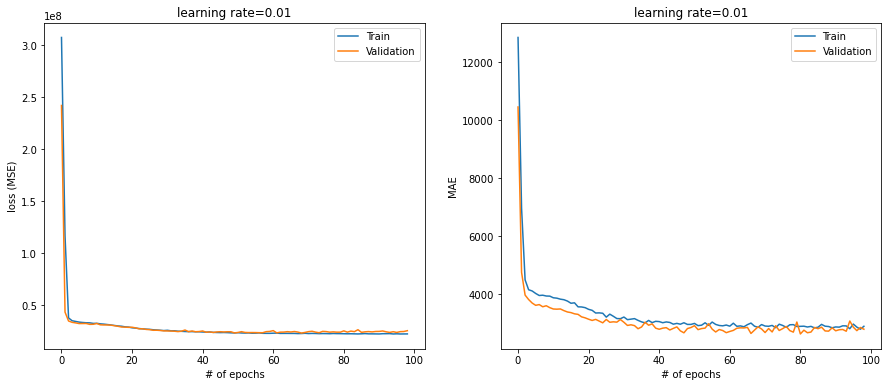

In [19]:
#plotting

fig, axs = plt.subplots(1,2,
                        figsize=(15, 6),
                        gridspec_kw={'hspace': 0.5, 'wspace': 0.2}) 
(ax1, ax2) = axs
ax1.plot(h.history['loss'], label='Train')
ax1.plot(h.history['val_loss'], label='Validation')
ax1.set_title('learning rate=' + str(0.01))
ax1.legend(loc="upper right")
ax1.set_xlabel("# of epochs")
ax1.set_ylabel("loss (MSE)")

ax2.plot(h.history['mae'], label='Train')
ax2.plot(h.history['val_mae'], label='Validation')
ax2.set_title('learning rate=' + str(0.01))
ax2.legend(loc="upper right")
ax2.set_xlabel("# of epochs")
ax2.set_ylabel("MAE")

#### Evaluation

In [26]:
val_mse, val_mae = model_regr.evaluate(x_test, y_test, verbose = 1)

5/5 [==============================] - 0s 1ms/step - loss: 19686920.0000 - mae: 2441.2908


In [27]:
y_predict = model_regr.predict(x_test)

5/5 [==============================] - 2s 1ms/step


### Predicted vs. Actual Charges

In [32]:
# show/hide code
a = y_test.values.reshape(-1,1).flatten()
b = y_predict.flatten()
diff = (b - a)

sim_data={"Actual Charges":a, 'Predicted Charges':b, 'Difference':np.round(diff,2)}

sim_data=pd.DataFrame(sim_data)

# Showing first 5 rows
sim_data.head(5)

,Actual Charges,Predicted Charges,Difference
0,9095.06825,10782.480469,1687.41
1,5272.17580,6419.902344,1147.73
2,29330.98315,32314.632812,2983.65
3,9301.89355,10176.330078,874.44
4,33750.29180,27592.048828,-6158.24


### Visualization

Text(0, 0.5, 'Predicted Charges')

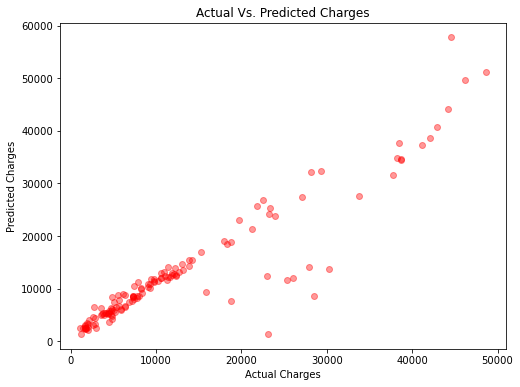

In [34]:
# visualization of actual vs. predicted charges
plt.figure(figsize=(8, 6)) 

plt.scatter(y_test, y_predict, alpha=0.4, color = 'red')
plt.title("Actual Vs. Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")

# GridSearchCV

### Function For Designing Model
Function that creates and returns your Keras sequential model (To use in skires wrappers)

In [35]:
def design_model(features):
  # ann model instance  
  model_regr = Sequential()
  
  
  #### INPUT LAYER>>>>
  #adding the input layer
  model_regr.add(Dense(units = X.shape[1] , activation = 'relu')) 


  #### HIDDEN LAYER1>>>>
  # there are a numbers of activation functions such as softmax, sigmoid, 
  # but ReLU (relu) (Rectified Linear Unit) is very effective in many applications and we’ll use it here.
  model_regr.add(Dense(128, activation = 'relu'))


  #### OUTPUT LAYER>>>>
  model_regr.add(Dense(1, activation = 'linear'))  


  #### Optimizer
  # WE have a lot of optimizers such as SGD (Stochastic Gradient Descent optimizer), Adam, RMSprop, and others.
  # right now adam is the best one as its solved previous optmizers issues.
  opt = Adam(learning_rate = 0.01)
  # loss/cost 
  # MSE, MAE, Huber loss  
  model_regr.compile(loss='mse',  metrics=['mae'], optimizer=opt)  
    

  return model_regr

Invoke our fucntion and pass the x_train argument then save it in a variable.

In [38]:
model_regr2 = design_model(x_train)

Fitting our training set to our `model_regr`

### Training Phase/Fit The Model

In [40]:
model_regr2.fit(x_train, y_train, 
                validation_split=0.2, 
                verbose=1)

31/31 [==============================] - 0s 5ms/step - loss: 309223424.0000 - mae: 12940.2773 - val_loss: 289929280.0000 - val_mae: 11897.8164


To use KerasRegressor, we must define a function that creates and returns your Keras sequential model,(Above Function)
then pass this function to the model argument when constructing the KerasClassifier class.

In [43]:
model = KerasRegressor(model = model_regr2)

### Setting Up Hyperparameters

This is computational extensive, we will use small value here.

List of hyperparameters:
 1. the learning rate
 2. number of batches
 3. number of epochs
 4. number of units per hidden layer
 5. activation functions.

In [44]:
param_grid = dict(epochs = [50,100],
                  batch_size = [1,10,50])

In [45]:
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    n_jobs=-1, # use all processor cores of our machine (faster!!)
                    scoring = 'r2',
                    return_train_score = True,
                    cv=3)

grid_result = grid.fit(x_train, y_train)

INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpe8rs3qgz\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpnmgacech\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmp86kvi9ud\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpi1pjnidb\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpg4nlrjoq\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmp2uwrckwj\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpuh1wkb6y\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpq47_fk0h\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpzy5plgyt\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpkysctbv7\assets
INFO:tensorflow:Assets written to: C:\Users\Toto\AppData\Local\Temp\tmpcgd9f0nl\assets
INFO:tensorflow:Assets written to: C:\Users

1204/1204 [==============================] - 1s 780us/step - loss: 23695836.0000 - mae: 2881.9966
Epoch 45/100
1204/1204 [==============================] - 1s 802us/step - loss: 23881438.0000 - mae: 2975.9783
Epoch 46/100
1204/1204 [==============================] - 1s 811us/step - loss: 23508826.0000 - mae: 2931.3577
Epoch 47/100
1204/1204 [==============================] - 1s 781us/step - loss: 23629864.0000 - mae: 2827.2256
Epoch 48/100
1204/1204 [==============================] - 1s 791us/step - loss: 23905580.0000 - mae: 2912.4146
Epoch 49/100
1204/1204 [==============================] - 1s 778us/step - loss: 23806574.0000 - mae: 2913.5784
Epoch 50/100
1204/1204 [==============================] - 1s 767us/step - loss: 24023214.0000 - mae: 2919.9800
Epoch 51/100
1204/1204 [==============================] - 1s 770us/step - loss: 23835378.0000 - mae: 2906.7744
Epoch 52/100
1204/1204 [==============================] - 1s 774us/step - loss: 23632646.0000 - mae: 2889.0735
Epoch 53/100
1

In [ ]:
grid_result.best_score_ , grid_result.best_params_

### Summary


1. Preparing the data for learning:
2. separating features from labels using array slicing
3. determining the shape of your data
4. preprocessing the categorical variables using one-hot encoding
5. splitting the data into training and test sets
6. scaling the numerical features
7. Designing a Sequential model by chaining InputLayer() and the tf.keras.layers.Dense layers. InputLayer() was used as a placeholder for the input data. The output layer in this case needed one neuron since we need a prediction of a single value in the regression. And finally, hidden layers were added with the relu activation function to handle complex dependencies in the data.
8. Choosing an optimizer using keras.optimizers with a specific learning rate hyperparameter.
9. Training the model - using model.fit() to train the model on the training data and training labels.
10. Setting the values for the learning hyperparameters: number of epochs and batch sizes.
11. Evaluating the model using model.evaluate() on the test data.
